In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [172]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [173]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [174]:
company_data.shape

(400, 11)

In [175]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [176]:
company_data[company_data.duplicated()].shape

(0, 11)

In [177]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<ipython-input-178-9d1ce6ec0f47>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company_data[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})


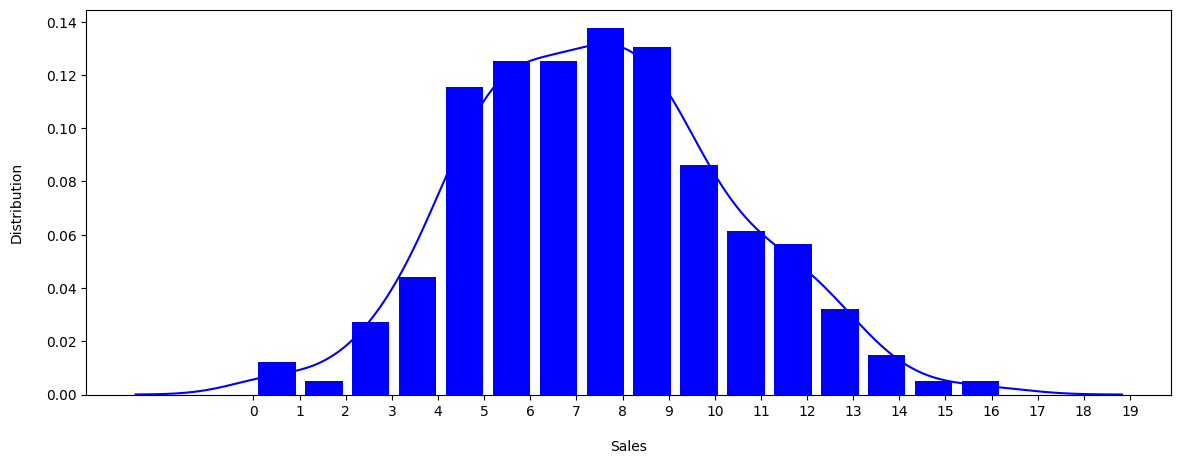

In [178]:
import seaborn as sns
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(company_data[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

In [179]:
categorical_features = company_data.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [180]:
numerical_features = company_data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

<ipython-input-181-e3eacb8aa1c9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company_data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)


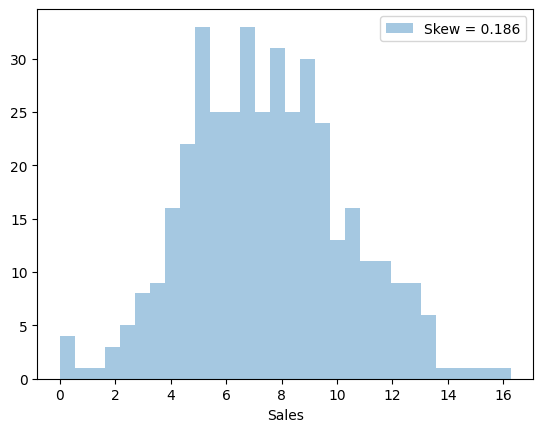

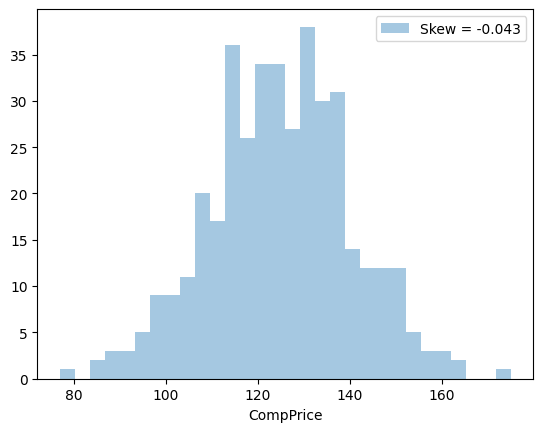

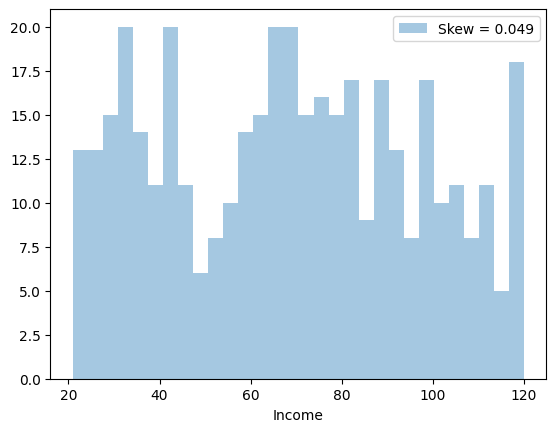

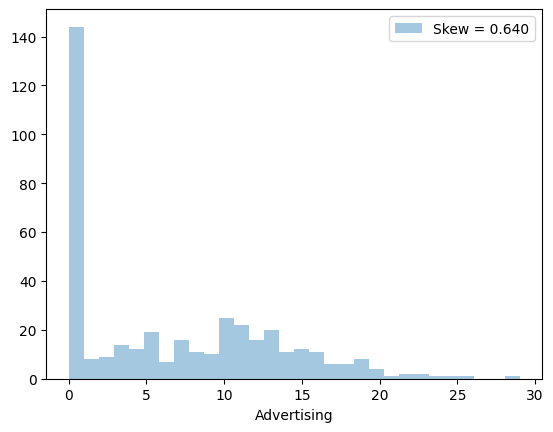

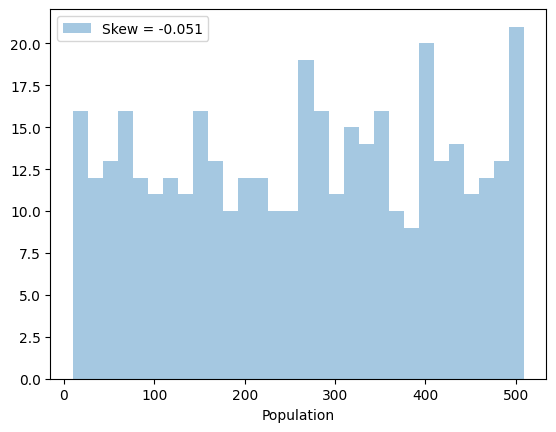

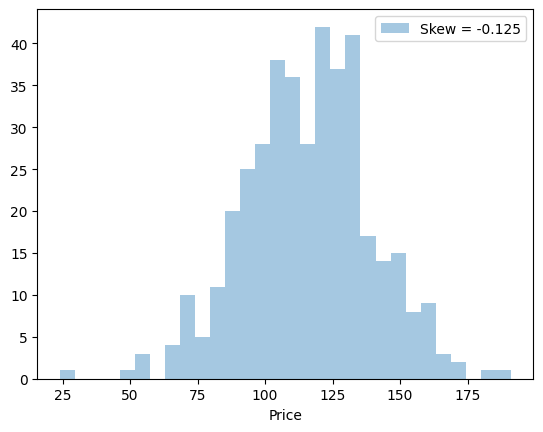

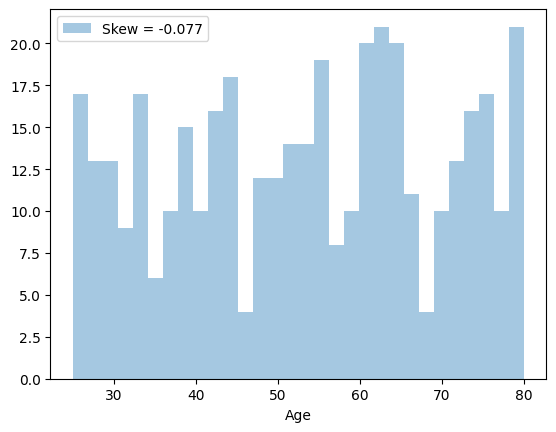

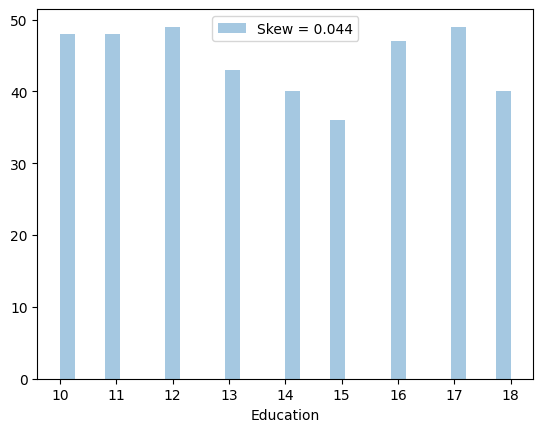

In [181]:
for i in numerical_features:
    skew = company_data[i].skew()
    sns.distplot(company_data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

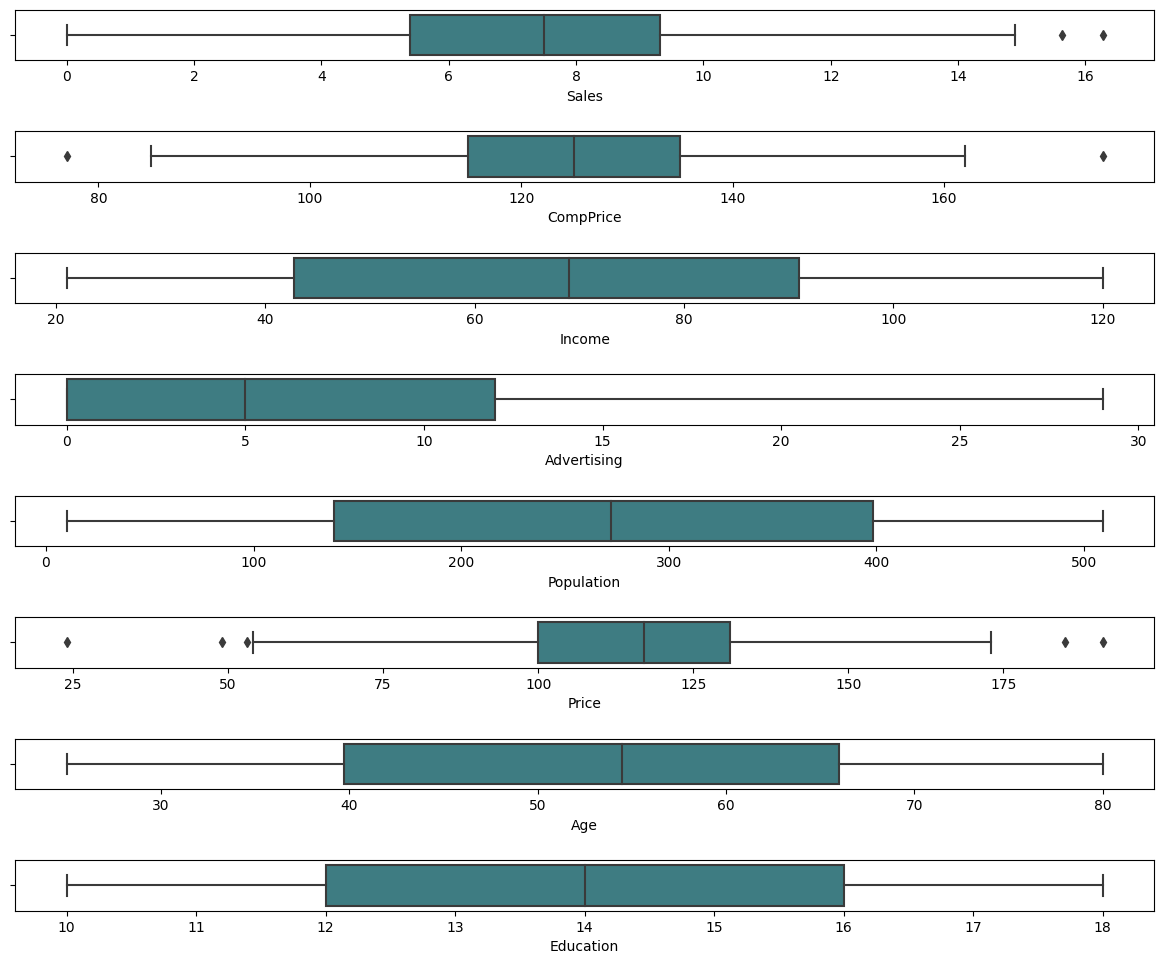

In [182]:
fig, axes = plt.subplots(8,1,figsize=(12,10),sharex=False,sharey=False)
sns.boxplot(x='Sales', data= company_data,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data= company_data,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data= company_data,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data= company_data,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data= company_data,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data= company_data,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data= company_data,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data= company_data,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

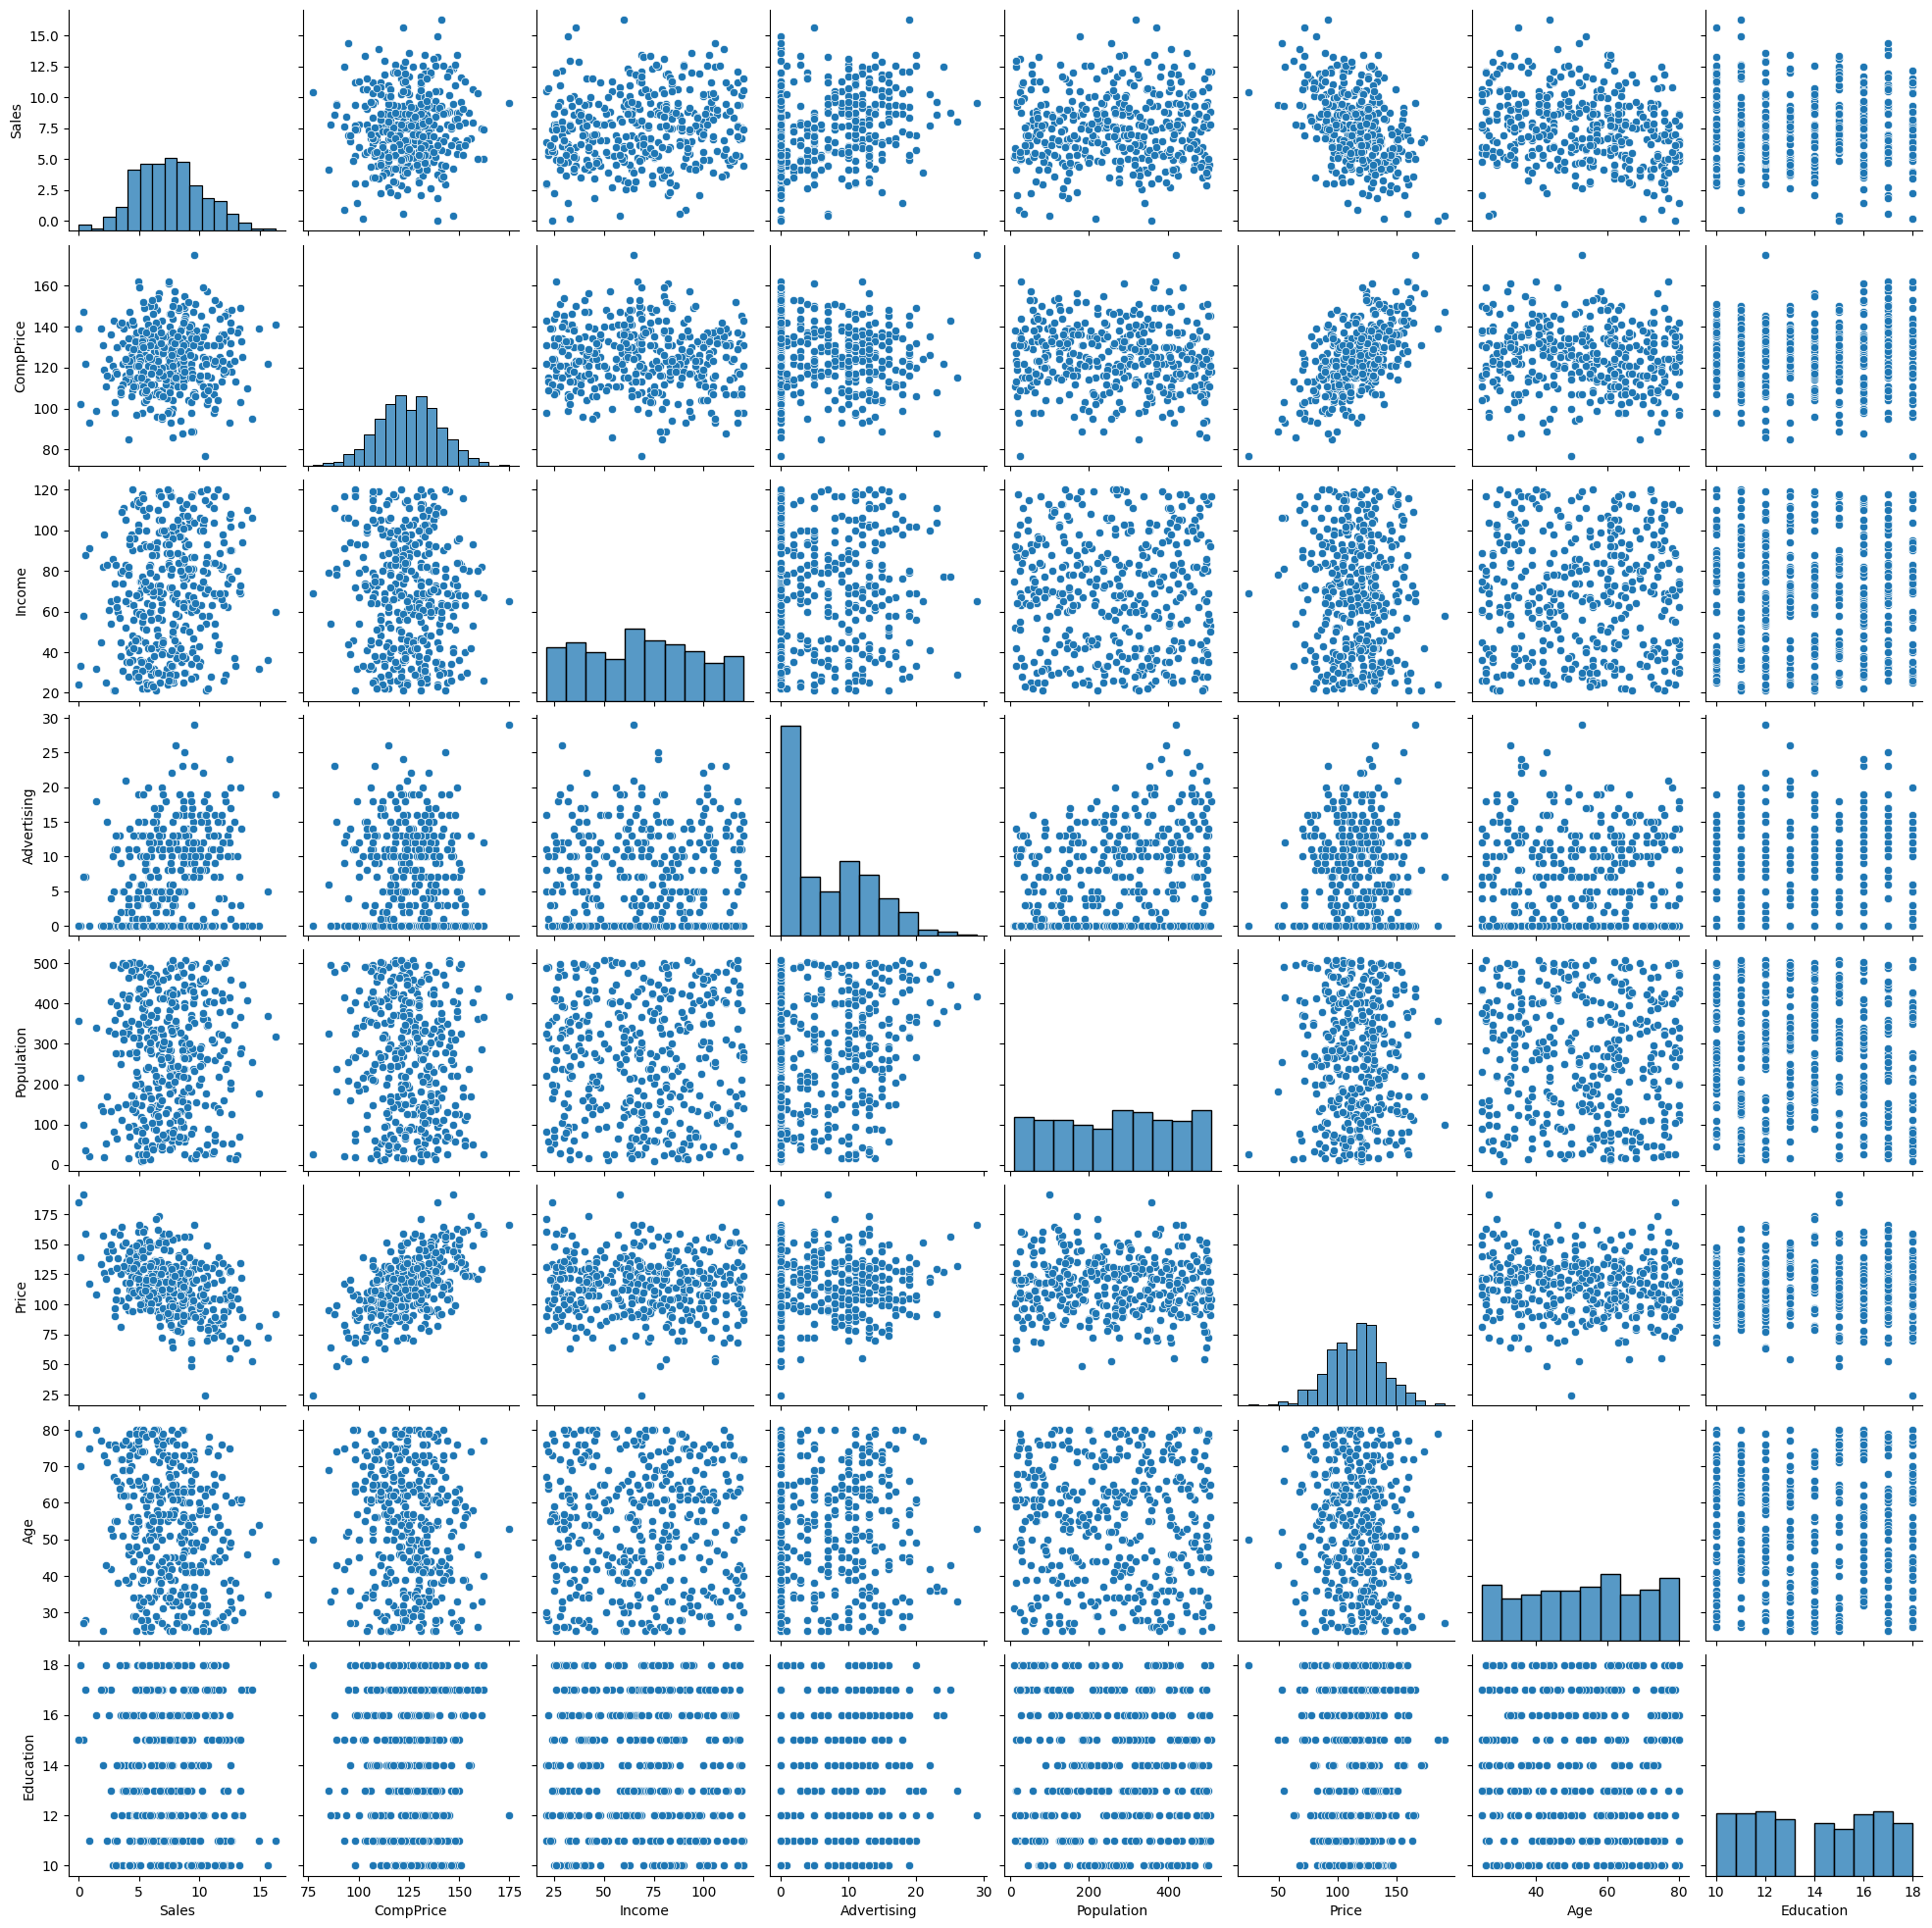

In [183]:
sns.pairplot(company_data)
plt.show()

<ipython-input-184-4926893ec19b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(company_data.corr(), annot=True, fmt='.2g', cmap="viridis")


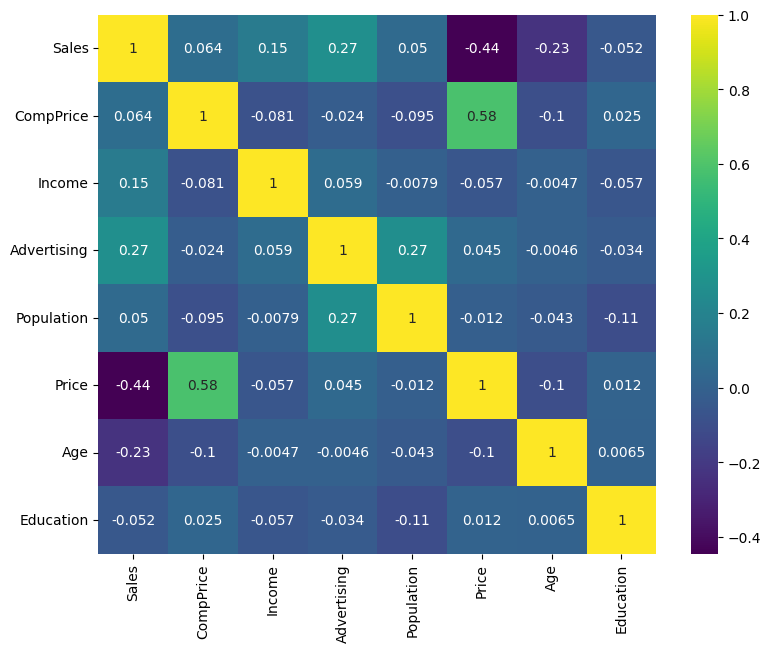

In [184]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(company_data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

In [185]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [186]:
company_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [187]:
company_data = pd.get_dummies(company_data)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [188]:
company_data['Sales1'] = pd.cut(x = company_data['Sales'], bins = [0,5.5,9.5,16.5], labels=['Low','Medium','High'], right = False)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales1
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [189]:
company_data.drop('Sales',axis=1, inplace =True)

In [190]:
company_data.Sales1.value_counts()

Medium    209
Low       103
High       88
Name: Sales1, dtype: int64

In [191]:
company_data['Sales'] = company_data.Sales1
company_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales1,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low,Low


In [192]:
company_data.drop('Sales1',inplace=True,axis=1)

In [193]:
label_enocoder = preprocessing.LabelEncoder()
company_data['Sales1'] = label_enocoder.fit_transform(company_data['Sales'])

In [194]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales,Sales1
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low,1


In [195]:
x = company_data.iloc[:,0:14]
y = company_data['Sales1']

In [196]:
colnames = list(company_data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes',
 'Sales',
 'Sales1']

In [197]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [198]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 14) (80, 14) (320,) (80,)


In [199]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

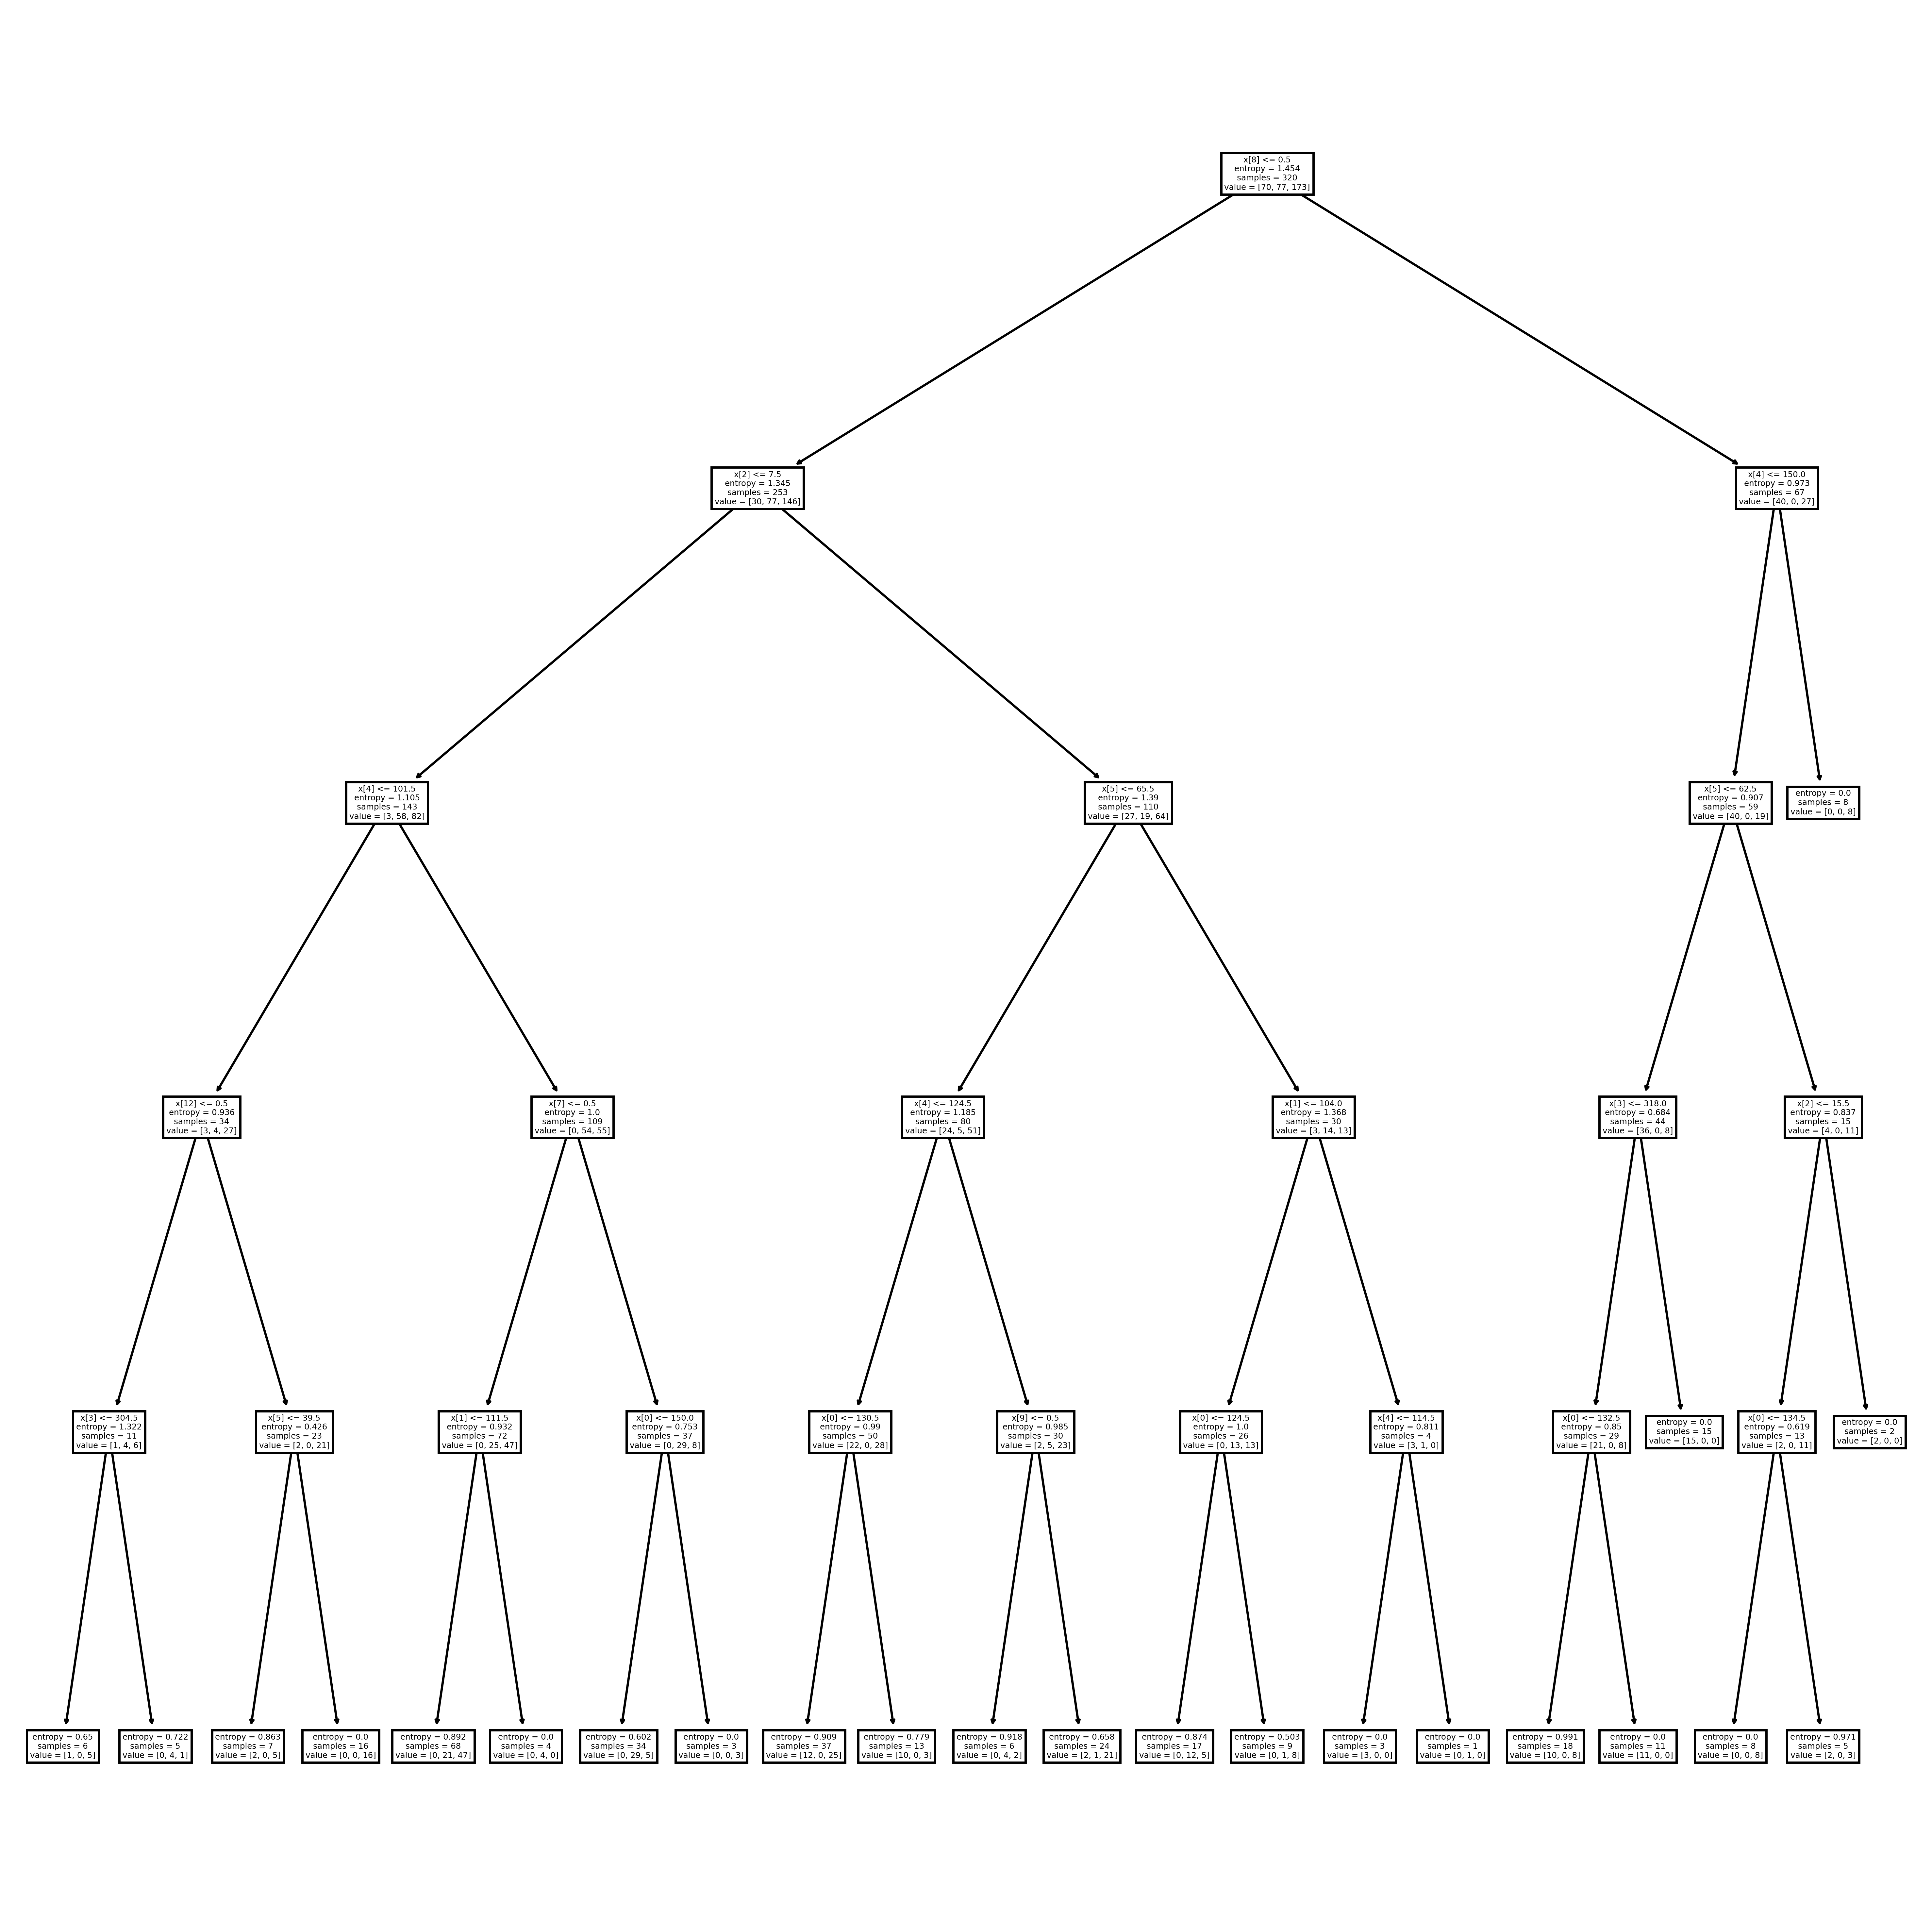

In [200]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,15),dpi=500)
tree.plot_tree(model);

In [201]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    52
1    14
0    14
dtype: int64

In [202]:
preds

array([2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2,
       2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1])

In [203]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales1,,,
0,7,1,10
1,0,8,18
2,7,5,24


In [204]:
np.mean(preds==y_test)

0.4875